In [14]:
import torch
import matplotlib.pyplot as plt
import numpy as np

In [15]:
attns = torch.load('/volsparse1/czh/exps/fcformer-bk/visualized_img/attns/attns_1.pth')


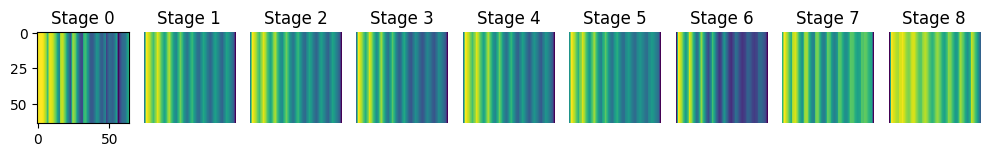

In [32]:
import matplotlib as mpl

def min_max_norm(x):
    x -= x.min()
    x /= x.max()
    
    return x

fig, axes = plt.subplots(1, len(attns), figsize=(10, 10))
if isinstance(axes, mpl.axes._axes.Axes):
    axes = [axes]
for i, (ax, attn) in enumerate(zip(axes, attns)):
    attn = attn[0][600][4]
    
    ax.imshow(attn)
    ax.set_title(f'Stage {i}')
    if i != 0:
        ax.set_axis_off()

plt.subplots_adjust(hspace=0, wspace=0.1)
plt.tight_layout()

In [54]:
from einops import rearrange

attn = attns[0][0]
attn = rearrange(attn, '(b nh nw) head n m -> b head (nh n) (nw m)', head=8, nh=256//8, nw=256//8)

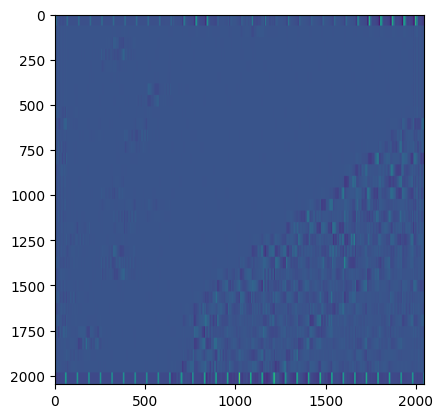

In [55]:
attn = min_max_norm(attn[0].mean(0))
plt.imshow(attn)